# Sahil Sheikh
## CWID: A20518693
## Subject:CS 577
## Semester: FALL 22
## ASSIGNMENT 4
CIFAR-10

In [2]:
import pandas as pd
import tensorflow as tf
import keras
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.utils import to_categorical
import sklearn
from sklearn.model_selection import train_test_split
from keras.layers import Input
from keras import Model

In [17]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [18]:
file1= r'C:/Users/sahil/Desktop/New folder/cifar-10-batches-py/data_batch_1'
file2= r'C:/Users/sahil/Desktop/New folder/cifar-10-batches-py/data_batch_2'
file3= r'C:/Users/sahil/Desktop/New folder/cifar-10-batches-py/data_batch_3'
file4= r'C:/Users/sahil/Desktop/New folder/cifar-10-batches-py/data_batch_4'
file5= r'C:/Users/sahil/Desktop/New folder/cifar-10-batches-py/data_batch_5'
file_test= r'C:/Users/sahil/Desktop/New folder/cifar-10-batches-py/test_batch'

In [19]:
batch_1 = unpickle(file1)
batch_2 = unpickle(file2)
batch_3 = unpickle(file3)
batch_4 = unpickle(file4)
batch_5 = unpickle(file5)
batch__test = unpickle(file_test)


In [20]:
batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [21]:
batch_1[b'data'].shape

(10000, 3072)

In [22]:
def ext_data_label(batch):
    data = batch[b'data']
    label = batch[b'labels']
    label = np.array(label)
    data = data.reshape(len(data),3,32,32).transpose(0,2,3,1)
    label = label.reshape(len(label),1)
    print(data.shape)
    print(label.shape)
    return data, label

In [23]:
def combine(x1,x2,x3,x4,x5):
    x1=np.concatenate((x1,x2),axis=0)
    x1=np.concatenate((x1,x3),axis=0)
    x1=np.concatenate((x1,x4),axis=0)
    x1=np.concatenate((x1,x5),axis=0)
    print(x1.shape)
    return x1

In [24]:
b1,l1 = ext_data_label(batch_1)
b2,l2 = ext_data_label(batch_2)
b3,l3 = ext_data_label(batch_3)
b4,l4 = ext_data_label(batch_4)
b5,l5 = ext_data_label(batch_5)
test,test_l = ext_data_label(batch__test)

(10000, 32, 32, 3)
(10000, 1)
(10000, 32, 32, 3)
(10000, 1)
(10000, 32, 32, 3)
(10000, 1)
(10000, 32, 32, 3)
(10000, 1)
(10000, 32, 32, 3)
(10000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [25]:
data = combine(b1,b2,b3,b4,b5)

(50000, 32, 32, 3)


In [26]:
label = combine(l1,l2,l3,l4,l5)

(50000, 1)


In [27]:
def load_data(data,label,test,test_label):
    data = data/255 #normalizing the image
    test = test/255
    label = to_categorical(label)
    test_label = to_categorical(test_label)
    train_x,vali_x,train_y,vali_y = train_test_split(data,label,test_size=0.2)
    return train_x,train_y,vali_x,vali_y,test,test_label,data,label

In [28]:
train_x,train_y,vali_x,vali_y,test_x,test_y,train,target = load_data(data,label,test,test_l)

In [29]:
print('Training data shape:',train_x.shape)
print('Training label shape:',train_y.shape)

Training data shape: (40000, 32, 32, 3)
Training label shape: (40000, 10)


We have preprocessed the data, split it into train-test-vali and now we create a model

In [60]:
def model_1():
    model = tf.keras.Sequential([
        keras.layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)),
        keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
        keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
        keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
        keras.layers.Flatten(),
        keras.layers.Dense(10,activation='softmax')        
    ])
    model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics =['accuracy'] )
    return model
 

In [32]:
def plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    return 0

Epoch 1/15
1250/1250 [==============================] - 21s 10ms/step - loss: 1.4486 - accuracy: 0.4811 - val_loss: 1.0437 - val_accuracy: 0.6317
Epoch 2/15
1250/1250 [==============================] - 12s 9ms/step - loss: 0.9451 - accuracy: 0.6666 - val_loss: 0.8898 - val_accuracy: 0.6958
Epoch 3/15
1250/1250 [==============================] - 12s 9ms/step - loss: 0.7543 - accuracy: 0.7364 - val_loss: 0.8781 - val_accuracy: 0.6946
Epoch 4/15
1250/1250 [==============================] - 12s 9ms/step - loss: 0.6040 - accuracy: 0.7907 - val_loss: 0.8520 - val_accuracy: 0.7204
Epoch 5/15
1250/1250 [==============================] - 12s 9ms/step - loss: 0.4655 - accuracy: 0.8381 - val_loss: 0.9005 - val_accuracy: 0.7147
Epoch 6/15
1250/1250 [==============================] - 12s 9ms/step - loss: 0.3398 - accuracy: 0.8824 - val_loss: 1.0653 - val_accuracy: 0.6963
Epoch 7/15
1250/1250 [==============================] - 12s 9ms/step - loss: 0.2404 - accuracy: 0.9158 - val_loss: 1.2545 - val_a

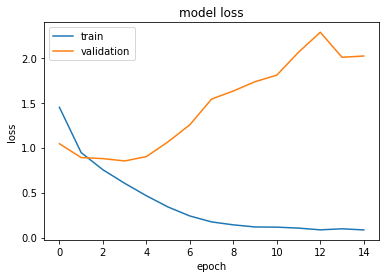

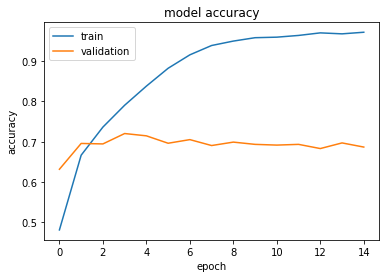

0

In [63]:
model1 = model_1()
history = model1.fit(train_x,train_y,validation_data=(vali_x,vali_y),epochs=15)
plot(history)

In [64]:
def model_2():
    model = tf.keras.Sequential([
        keras.layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)),
        keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
        keras.layers.Flatten(),
        keras.layers.Dense(10,activation='softmax')        
    ])
    model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics =['accuracy'] )
    return model
 

Epoch 1/15
1250/1250 [==============================] - 6s 4ms/step - loss: 1.3074 - accuracy: 0.5349 - val_loss: 1.0689 - val_accuracy: 0.6330
Epoch 2/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8749 - accuracy: 0.6970 - val_loss: 0.8967 - val_accuracy: 0.6924
Epoch 3/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6851 - accuracy: 0.7645 - val_loss: 0.8418 - val_accuracy: 0.7140
Epoch 4/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5193 - accuracy: 0.8213 - val_loss: 0.8963 - val_accuracy: 0.7174
Epoch 5/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3811 - accuracy: 0.8671 - val_loss: 1.0061 - val_accuracy: 0.7120
Epoch 6/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2503 - accuracy: 0.9141 - val_loss: 1.1014 - val_accuracy: 0.7113
Epoch 7/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1693 - accuracy: 0.9406 - val_loss: 1.2745 - val_accuracy:

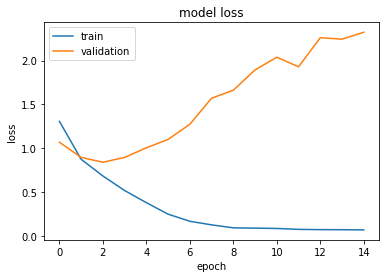

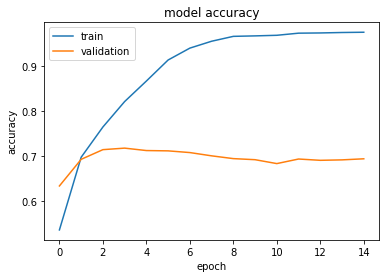

0

In [66]:
model2 = model_2()
history = model2.fit(train_x,train_y,validation_data=(vali_x,vali_y),epochs=15)
plot(history)

In [80]:
def model_1batch():
    model = tf.keras.Sequential([
        keras.layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)),
        keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
        keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
        keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Flatten(),
        keras.layers.Dense(10,activation='softmax')        
    ])
    model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics =['accuracy'] )
    return model
 

Epoch 1/10
1250/1250 [==============================] - 13s 10ms/step - loss: 1.3033 - accuracy: 0.5387 - val_loss: 3.1294 - val_accuracy: 0.2709
Epoch 2/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.9875 - accuracy: 0.6589 - val_loss: 1.6391 - val_accuracy: 0.5178
Epoch 3/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.8528 - accuracy: 0.7047 - val_loss: 1.4486 - val_accuracy: 0.5625
Epoch 4/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.7473 - accuracy: 0.7431 - val_loss: 1.3496 - val_accuracy: 0.6008
Epoch 5/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.6432 - accuracy: 0.7763 - val_loss: 1.0537 - val_accuracy: 0.6521
Epoch 6/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.5312 - accuracy: 0.8130 - val_loss: 1.1258 - val_accuracy: 0.6660
Epoch 7/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.4245 - accuracy: 0.8513 - val_loss: 1.3416 -

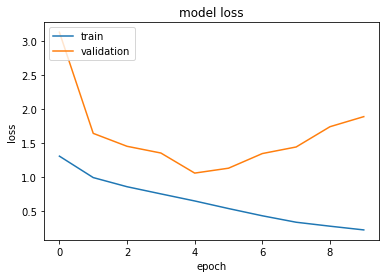

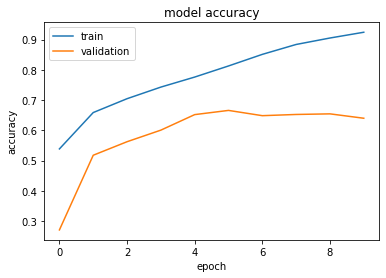

0

In [81]:
model1b = model_1batch()
history = model1b.fit(train_x,train_y,validation_data=(vali_x,vali_y),epochs=10)
plot(history)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Input
input_img = Input(shape = (32, 32, 3))
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)
tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)

In [36]:
def incp_model():
    input_img = Input(shape = (32, 32, 3))
    r_1 = keras.layers.Conv2D(8, (1,1), padding='same', activation='relu')(input_img)
    r_2 = keras.layers.Conv2D(8, (3,3), padding='same', activation='relu')(input_img)
    r_3 = keras.layers.Conv2D(8, (5,5), padding='same', activation='relu')(input_img)
    output = keras.layers.concatenate([r_1, r_2, r_3], axis = 3)
    layer0 = keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(output)
    layer1 = keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(layer0)
    layer2 = keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(layer1)
    layer3 = keras.layers.MaxPool2D(2,2)(layer2)
    layer4 = keras.layers.Conv2D(256,(3,3),activation='relu',padding='same')(layer3)
    layer5 = keras.layers.Flatten()(layer4)
    out = keras.layers.Dense(10,activation='sigmoid')(layer5)
    model_incp = Model(inputs = input_img, outputs = out)
    model_incp.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics =['accuracy'] )
    return model_incp


In [38]:
def plotf(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['accuracy'])
    plt.title('Accuracy vs loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train acc', 'train loss'], loc='upper left')
    plt.show()


Epoch 1/15
1250/1250 [==============================] - 14s 11ms/step - loss: 1.3869 - accuracy: 0.5038 - val_loss: 1.0947 - val_accuracy: 0.6120
Epoch 2/15
1250/1250 [==============================] - 13s 10ms/step - loss: 0.9052 - accuracy: 0.6836 - val_loss: 0.8869 - val_accuracy: 0.6868
Epoch 3/15
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6935 - accuracy: 0.7582 - val_loss: 0.8324 - val_accuracy: 0.7149
Epoch 4/15
1250/1250 [==============================] - 13s 10ms/step - loss: 0.5239 - accuracy: 0.8176 - val_loss: 0.8509 - val_accuracy: 0.7169
Epoch 5/15
1250/1250 [==============================] - 13s 11ms/step - loss: 0.3573 - accuracy: 0.8744 - val_loss: 0.9896 - val_accuracy: 0.7179
Epoch 6/15
1250/1250 [==============================] - 13s 11ms/step - loss: 0.2332 - accuracy: 0.9183 - val_loss: 1.1598 - val_accuracy: 0.7113
Epoch 7/15
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1552 - accuracy: 0.9453 - val_loss: 1.4541 -

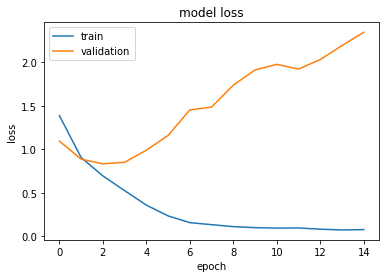

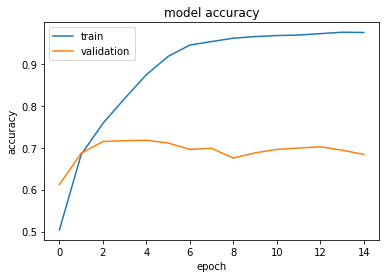

0

In [37]:
model_inc = incp_model()
history = model_inc.fit(train_x,train_y,validation_data=(vali_x,vali_y),epochs=15)
plot(history)

Epoch 1/5
1563/1563 - 11s - loss: 1.2841 - accuracy: 0.5444 - 11s/epoch - 7ms/step
Epoch 2/5
1563/1563 - 10s - loss: 0.8896 - accuracy: 0.6928 - 10s/epoch - 7ms/step
Epoch 3/5
1563/1563 - 10s - loss: 0.7409 - accuracy: 0.7445 - 10s/epoch - 7ms/step
Epoch 4/5
1563/1563 - 11s - loss: 0.6147 - accuracy: 0.7882 - 11s/epoch - 7ms/step
Epoch 5/5
1563/1563 - 10s - loss: 0.4936 - accuracy: 0.8293 - 10s/epoch - 7ms/step


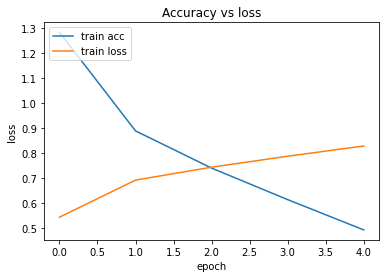

313/313 [==============================] - 1s 2ms/step - loss: 0.9214 - accuracy: 0.7126


[0.921441912651062, 0.7125999927520752]

In [40]:
history=model_incp.fit(train,target,epochs=5,verbose=2)
plotf(history)
model_incp.evaluate(test_x,test_y)

In [53]:
def model_res():
    input_img = Input(shape = (32, 32, 3))
    layer = keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(input_img)
    r_1 = keras.layers.Conv2D(32, (3,3), padding='same', activation='relu')(layer)
    r_2 = keras.layers.BatchNormalization(axis=3)(r_1)
    r_3 = keras.layers.Activation('relu')(r_2)
    r_4 = keras.layers.Conv2D(32, (3,3), padding = 'same')(r_3)
    r_5 = tf.keras.layers.BatchNormalization(axis=3)(r_4)
    r = tf.keras.layers.Add()([r_5, layer])
    output = tf.keras.layers.Activation('relu')(r)
    layer0 = keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(output)
    layer1 = keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(layer0)
    layer2 = keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(layer1)
    layer3 = keras.layers.MaxPool2D(2,2)(layer2)
    layer4 = keras.layers.Conv2D(256,(3,3),activation='relu',padding='same')(layer3)
    layer5 = keras.layers.Flatten()(layer4)
    out = keras.layers.Dense(10,activation='sigmoid')(layer5)
    model = Model(inputs = input_img, outputs = out)
    model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics =['accuracy'] )
    return model



Epoch 1/10
1250/1250 [==============================] - 16s 12ms/step - loss: 1.4094 - accuracy: 0.4967 - val_loss: 1.2280 - val_accuracy: 0.5656
Epoch 2/10
1250/1250 [==============================] - 15s 12ms/step - loss: 0.9767 - accuracy: 0.6546 - val_loss: 0.9943 - val_accuracy: 0.6539
Epoch 3/10
1250/1250 [==============================] - 15s 12ms/step - loss: 0.7892 - accuracy: 0.7254 - val_loss: 0.8748 - val_accuracy: 0.6962
Epoch 4/10
1250/1250 [==============================] - 15s 12ms/step - loss: 0.6548 - accuracy: 0.7719 - val_loss: 0.8770 - val_accuracy: 0.6973
Epoch 5/10
1250/1250 [==============================] - 15s 12ms/step - loss: 0.5204 - accuracy: 0.8192 - val_loss: 0.9724 - val_accuracy: 0.6942
Epoch 6/10
1250/1250 [==============================] - 15s 12ms/step - loss: 0.3805 - accuracy: 0.8670 - val_loss: 1.0301 - val_accuracy: 0.6889
Epoch 7/10
1250/1250 [==============================] - 15s 12ms/step - loss: 0.2721 - accuracy: 0.9026 - val_loss: 1.2309 -

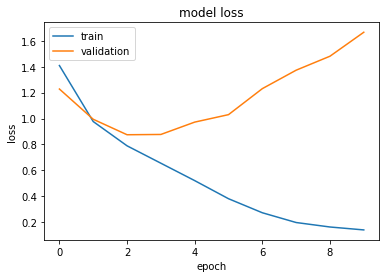

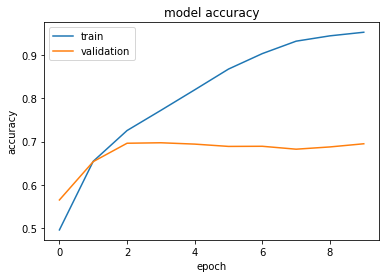

0

In [54]:
res_model = model_res()
history=res_model.fit(train_x,train_y,validation_data=(vali_x,vali_y),epochs=10)
plot(history)

Epoch 1/5
1563/1563 - 18s - loss: 0.3504 - accuracy: 0.8993 - 18s/epoch - 11ms/step
Epoch 2/5
1563/1563 - 17s - loss: 0.1941 - accuracy: 0.9376 - 17s/epoch - 11ms/step
Epoch 3/5
1563/1563 - 17s - loss: 0.1399 - accuracy: 0.9527 - 17s/epoch - 11ms/step
Epoch 4/5
1563/1563 - 17s - loss: 0.1222 - accuracy: 0.9577 - 17s/epoch - 11ms/step
Epoch 5/5
1563/1563 - 17s - loss: 0.1051 - accuracy: 0.9637 - 17s/epoch - 11ms/step


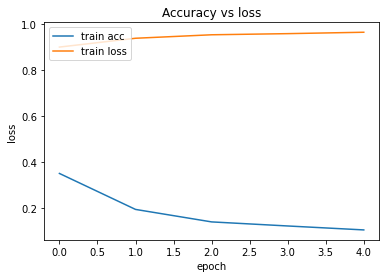

313/313 [==============================] - 1s 3ms/step - loss: 0.9214 - accuracy: 0.7126


[0.921441912651062, 0.7125999927520752]

In [55]:
history=res_model.fit(train,target,epochs=5,verbose=2)
plotf(history)
model_incp.evaluate(test_x,test_y)